-[Kaggle Notebook](https://www.kaggle.com/code/rmonge/predicting-molecule-properties-based-on-its-smiles/notebook)

# QM9 - Quantum chemistry structures and properties of 134 kilo molecules

### 1. Description of the dataset
The qm9 dataset holds information on the energetic, electronic and thermodynamic properties of 134 kilo molecules composed of carbon, hidrogen, oxigen, nitrogen and phosphorus atoms [1]. Information on the atomic cartesian coordinates for each molecule is also presented and they are all stored in a plain text format known as XYZ. Such dataset is often used for training and test of machine learning models, specially those who seek to identify relationships between the structure and the properties of a molecule [2,3]. More information of the qm9 content can be seen on tables 1 and 2.

**Table 1** - XYZ-like file format for molecular structure and properties.

| Line      | Content                                                                           |
|-----------|-----------------------------------------------------------------------------------|
| 1         | Number of atoms n                                                                 |
| 2         | Scalar properties                                                                 |
| 3,...,n+2 | Element type, coordinate (x, y, z in A), Mulliken partial charges (in e) on atoms |
| n+3       | Harmonic vibrational frequencies (3n-5 or 3n-6 in cm-1)                           |
| n+4       | SMILES strings from GDB-17 and from B3LYP relaxation                              |
| n+5       | InChI string for Corina and B3LYP geometries                                      |

**Table 2** - Calculated properties. Properties are stored in the order given by the first column.

| No. | Property | Unit      | Description                             |
|-----|----------|-----------|-----------------------------------------|
| 1   | tag      | -         | ‘gdb9’ string to facilitate extraction  |
| 2   | i        | -         | Consecutive, 1-based integer identifier |
| 3   | A        | GHz       | Rotational constant                     |
| 4   | B        | GHz       | Rotational constant                     |
| 5   | C        | GHz       | Rotational constant                     |
| 6   | μ        | D         | Dipole moment                           |
| 7   | α        | a³        | Isotropic polarizability                |
| 8   | homo     | Ha        | Energy of HOMO                          |
| 9   | lumo     | Ha        | Energy of LUMO                          |
| 10  | gap      | Ha        | Gap (lumo − homo)                       |
| 11  | R²       | Ha        | Electronic spatial extent               |
| 12  | zpve     | Ha        | Zero point vibrational energy           |
| 13  | Uo       | Ha        | Internal energy at 0 K                  |
| 14  | U        | Ha        | Internal energy at 298.15 K             |
| 15  | H        | Ha        | Enthalpy at 298.15 K                    |
| 16  | G        | Ha        | Free energy at 298.15 K                 |
| 17  | Cv       | cal/mol K | Heat capacity at 298.15 K               |

The qm9 dataset is public available and its raw content can be download in [this link](https://figshare.com/collections/Quantum_chemistry_structures_and_properties_of_134_kilo_molecules/978904).

### 2. Projects' outline
The goal of this project is to use machine learning algorithms to predict molecular properties and thus identify possible relationships between the properties of a molecule and its structure.
As such, there are two main steps that need to be performed:
1. **Ensure SMILES validity**: "SMILES" stands for simplified molecular-input line-entry system and they describe the structure of chemical specie using short ASCII strings [4]. A common example of a SMILES representation is the one of the benzene molecule: 'c1ccccc1', where 'c' represents the atom of carbon and the number 1 the beginning and end of a cyclic structure, as can be seen in Figure 1. <br><br>
**Figure 1** - The benzene molecule
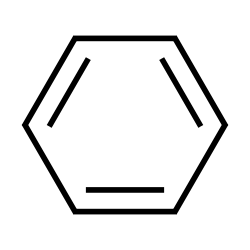
Some of the most important information of a molecule can be extracted based on its SMILES representation by using a number of different python packages. Thus, it's import to ensure that they are both valid, i.e., contain only valid characters, and unique, meaning that each molecule must have a unique representation. This requires a detailed **data wrangling** process.

2. **Use a suitable molecule representation**: Machine learning algorithms can speed up the process of identifying molecule's properties or even designing novel molecules with desirable properties [5]. This can have enormous consequences on many fields, such as the development of new materials for batteries and solar panels, or the sinthesis of new and more reliable drugs. However, to achieve such goal it's important to use a molecule representation that capture most of its inate properties and can also be easily fed to a machine learning. There are a number of different representantions and the the most common are shown in Figure 2.

**Figure 2** - Different representations of a molecule
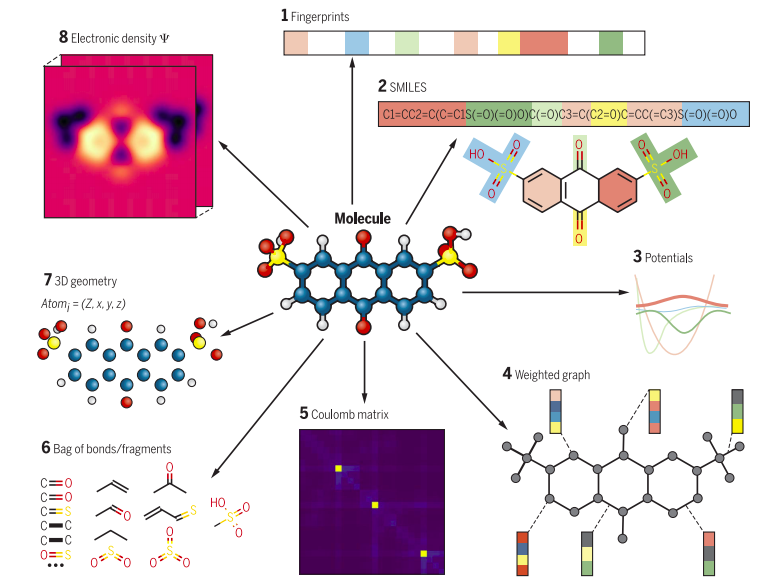

Two representations were chosen: **molecule descriptors** and the **coulomb matrix**, each of which will be discussed later.

### 3. Data wrangling and exploratory data analysis - Ensuring SMILES validity and better understanding the dataset

**3.1 - Data wrangling**


Here, the qm9 dataset will be further explored to ensure not only the SMILES validity, but also to better describe and understand the properties and features of each molecule. The first step is to install the required libraries:
* **RDKit** - The RDKit is a collection of cheminformatics and machine-learning software written in C++ and Python which is mainly used for extracting informations of a molecule based on its SMILES representation;
* **mordred** - It's a molecule descriptor calculator. The mordred can be used to calculated 1613 descriptors. A molecule descriptor can ultimately be viewed as a numerical representation of molecules' properties that are generated by algorithms. Thus, they can be used as input in a machine learning model.
* **molml** - A [library](https://pypi.org/project/molml/) to interface molecules and machine learning. The goal of this library is to be a simple way to convert molecules into a vector representation for later use with libraries such as scikit-learn.

In [1]:
# instaling the rdkit for molecule manipulation and visualization
!conda install -y -c rdkit rdkit

Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - rdkit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boost-1.72.0               |   py37h48f8a5e_1         339 KB  conda-forge
    ca-certificates-2020.12.5  |       ha878542_0         137 KB  conda-forge
    certifi-2020.12.5          |   py37h89c1867_0         143 KB  conda-forge
    conda-4.9.2                |   py37h89c1867_0         3.0 MB  conda-forge
    freetype-2.10.4            |       h7ca028e_0         912 KB  conda-forge
    rdkit-2020.09.2            |   py37h8f71f70_0        25.8 MB  conda-forge
    reportlab-3.5.51           |   py37hd14fb90_0         2.2 MB
    ------------------------------------------------------------
                                           Total:        32.6 MB

The following NEW packages will be INSTALLED:

  boost              co

In [2]:
# Installing mordred for molecular descriptors

!conda install -y -c rdkit -y -c mordred-descriptor mordred

Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - mordred


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    mordred-1.2.0              |     pyhe5148d4_0         257 KB  mordred-descriptor
    ------------------------------------------------------------
                                           Total:         257 KB

The following NEW packages will be INSTALLED:

  mordred            mordred-descriptor/noarch::mordred-1.2.0-pyhe5148d4_0



mordred-1.2.0        | 257 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [3]:
! pip install molml

     |████████████████████████████████| 49 kB 700 kB/s eta 0:00:011
  Created wheel for molml: filename=molml-0.9.0-py3-none-any.whl size=48113 sha256=82df4540ee164b265174348d28fb514d7d14165894fc5297d2918d6f5f545490
  Stored in directory: /root/.cache/pip/wheels/fd/e0/af/d7f31c593ca14b103e3e201575a81773dd264f09f0bd402d9a
Successfully built molml
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [4]:
import os
import rdkit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler
from rdkit import Chem  # To extract information of the molecules
from rdkit.Chem import Draw  # To draw the molecules
from mordred import Calculator, descriptors  # To calculate descriptors
from molml.features import CoulombMatrix  # To calculate the coulomb matrix
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ReduceLROnPlateau

In [5]:
# Checking the number of XYZ files
directory = "/kaggle/input/qm9dataset/"
len(os.listdir(directory))

133885

There are 133885 XYZ archives, each containing information about a specific molecule.

In [6]:
# Reading a file for visualization
file = os.listdir(directory)[0]
with open(directory + file, "r") as f:
    content = f.readlines()

for line in content:
    print(line)

17

gdb 95612	2.22285	1.68373	1.03938	3.5616	69.15	-0.2477	-0.0795	0.1682	1120.9648	0.135811	-459.003369	-458.995135	-458.994191	-459.036415	30.944	

O	 0.0499544823	 1.396957064	 0.1424493684	-0.439682

C	-0.0123734777	 0.0079840263	 0.0111631292	 0.051545

C	-1.4609968736	-0.5174016971	 0.011522986	-0.226663

C	-1.4886459066	-2.0445830588	-0.1225071679	-0.230581

C	-0.8231676827	-2.5175653646	-1.4307410357	-0.30906

C	 0.5749555768	-1.9502682307	-1.6030825081	 0.320768

O	 1.5340561913	-2.5745393472	-1.978861475	-0.275545

C	 0.6973019198	-0.44985628	-1.2543654859	 0.279858

O	 1.2994019744	 0.3299899862	-1.9549917403	-0.310485

H	 0.6183023973	 1.7055041111	-0.5812909845	 0.296536

H	 0.5173522181	-0.4847837727	 0.85070819	 0.101523

H	-1.9442478742	-0.1948477457	 0.9381416914	 0.123334

H	-2.0062185357	-0.0455737184	-0.815312258	 0.113586

H	-0.9743646477	-2.4999615485	 0.7331560914	 0.117034

H	-2.5205921347	-2.4060570615	-0.0927145948	 0.11866

H	-0.7714517695	-3.6062437822	-1.51

Information about what each row represents can be seen in Table 1. To further reach the goal of this project, not all information of the XYZ files is needed. Only the scalar properties, the atoms and its cartesian coordenates and the SMILES representation will be extracted. Using RDKit, it is easy to graph a molecule by its SMILES string, as can be seeing below.

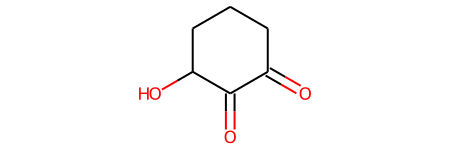

In [7]:
smile_example = Chem.MolFromSmiles(content[17 + 3].split()[0])
smile_example

First, let's read the entire qm9 dataset.

In [8]:
def read_xyz(path):
    """
    Reads the xyz files in the directory on 'path'
    Input
    path: the path to the folder to be read

    Output
    atoms: list with the characters representing the atoms of a molecule
    coordinates: list with the cartesian coordinates of each atom
    smile: list with the SMILE representation of a molecule
    prop: list with the scalar properties
    """
    atoms = []
    coordinates = []

    with open(path, "r") as file:
        lines = file.readlines()
        n_atoms = int(lines[0])  # the number of atoms
        smile = lines[n_atoms + 3].split()[0]  # smiles string
        prop = lines[1].split()[2:]  # scalar properties

        # to retrieve each atmos and its cartesian coordenates
        for atom in lines[2 : n_atoms + 2]:
            line = atom.split()
            # which atom
            atoms.append(line[0])

            # its coordinate
            # Some properties have '*^' indicading exponentiation
            try:
                coordinates.append((float(line[1]), float(line[2]), float(line[3])))
            except:
                coordinates.append(
                    (
                        float(line[1].replace("*^", "e")),
                        float(line[2].replace("*^", "e")),
                        float(line[3].replace("*^", "e")),
                    )
                )

    return atoms, coordinates, smile, prop

In [9]:
# Reads the xyz files and return the properties, smiles and coordinates
data = []
smiles = []
properties = []
for file in os.listdir(directory):
    path = os.path.join(directory, file)
    atoms, coordinates, smile, prop = read_xyz(path)
    data.append((atoms, coordinates))  # A tuple with the atoms and its coordinates
    smiles.append(smile)  # The SMILES representation
    properties.append(prop)  # The molecules properties

The properties and the SMILES strings will be organized in dataframe. The ```data``` object contains the atoms and its cartesian coordinates for each molecule and they will be later used for the calculations of the coulomb matrix.

In [10]:
properties_names = [
    "A",
    "B",
    "C",
    "mu",
    "alfa",
    "homo",
    "lumo",
    "gap",
    "R²",
    "zpve",
    "U0",
    "U",
    "H",
    "G",
    "Cv",
]
df = pd.DataFrame(properties, columns=properties_names).astype("float32")
df["smiles"] = smiles
df.head()

,A,B,C,mu,alfa,homo,lumo,gap,R²,zpve,U0,U,H,G,Cv,smiles
0,2.22285,1.68373,1.03938,3.5616,69.150002,-0.2477,-0.0795,0.1682,1120.964844,0.135811,-459.003357,-458.995148,-458.994202,-459.036407,30.944000,OC1CCCC(=O)C1=O
1,3.20949,1.03020,0.90173,3.3429,73.790001,-0.2658,-0.0604,0.2054,1269.614136,0.112100,-413.003174,-412.993744,-412.992798,-413.038788,32.019001,CN(CC#N)C(=N)C#N
2,2.21344,1.73569,1.60181,1.5915,82.260002,-0.2359,0.0099,0.2458,1017.333496,0.184910,-387.084625,-387.076752,-387.075806,-387.116486,31.790001,CC1C2CCC=CC1O2
3,3.36563,1.39133,0.99044,1.6905,69.889999,-0.2373,-0.0761,0.1612,1092.671997,0.101145,-474.133057,-474.125610,-474.124664,-474.165070,27.830999,CN1N=NC(F)=CC1=N
4,3.62588,1.25487,0.98515,3.9700,80.610001,-0.2410,-0.0803,0.1607,1131.271362,0.100994,-399.513092,-399.505707,-399.504761,-399.545013,28.332001,O=C1C=C(C#C)C2NC12


The easiest way to check for inconsistencies in the SMILES representation of a molecule is to simply read it using RDKit. Should the representation presents an error, the [RDKIT should be unable to properly read its content](https://www.rdkit.org/docs/GettingStartedInPython.html), therefore returning a None value.

In [11]:
# Reading each molecule by its SMILES string
df["mol"] = df["smiles"].apply(lambda x: Chem.MolFromSmiles(x))

In [12]:
# Checking if there are None values
df["mol"].isnull().sum()

0

Surprisingly, all molecules were successfully read by the RDKIT package. As a first approach, this may not represent an issue, but for future developments it would be important to check if this result is solid. Let's now visualize some of the molecules.

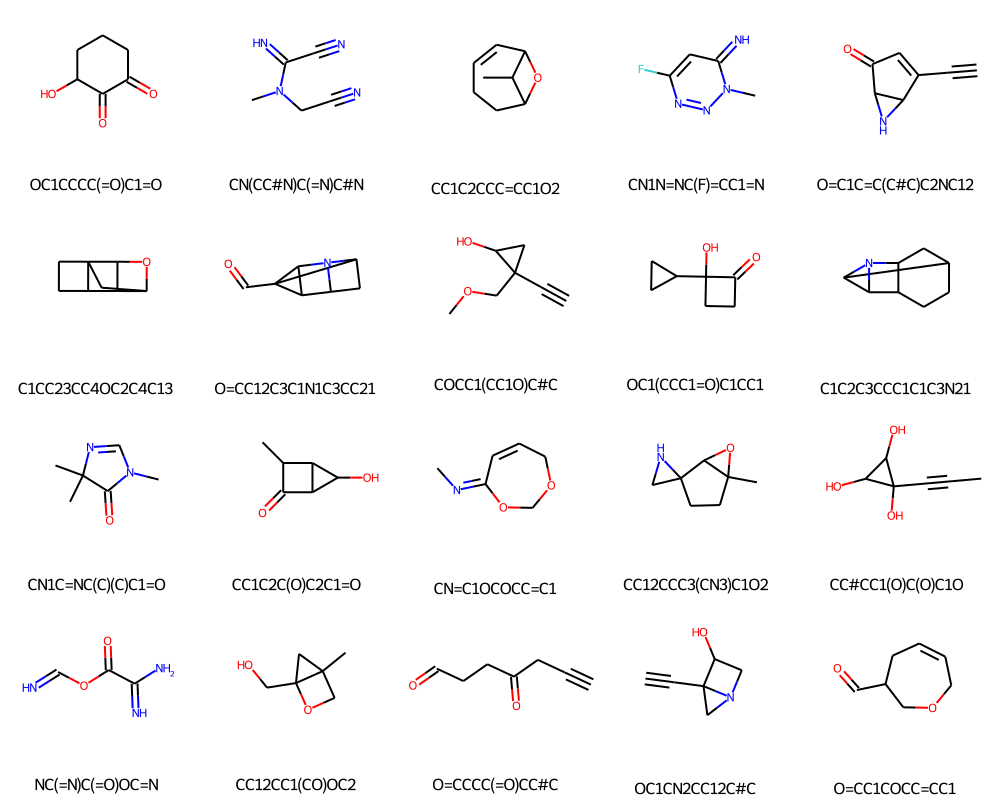

In [13]:
# Reads and prints the 20 first molecules
mol = df["mol"][:20]

Draw.MolsToGridImage(
    mol, molsPerRow=5, useSVG=True, legends=list(df["smiles"][:20].values)
)

Notice that the SMILES representation does not shows the hidrogen atoms, as they are implied by the rest of the molecules. However, counting the number of atoms using RDKit will return the wrong number of atoms. For example, let's consider just the first molecule.

In [14]:
df["mol"][0].GetNumAtoms()

9

It returns 9, which is the exact number of molecules seeing in its SMILES representation: OC1CCCC(=O)C1=O, where the number 1 represents the beginning and the end of rind bound structures. However, the total number of atoms in this molecule is 17, as can be seen in the "data" object that contains the atoms of a molecule and its coordinates. 

In [15]:
data[0]

(['O',
  'C',
  'C',
  'C',
  'C',
  'C',
  'O',
  'C',
  'O',
  'H',
  'H',
  'H',
  'H',
  'H',
  'H',
  'H',
  'H'],
 [(0.0499544823, 1.396957064, 0.1424493684),
  (-0.0123734777, 0.0079840263, 0.0111631292),
  (-1.4609968736, -0.5174016971, 0.011522986),
  (-1.4886459066, -2.0445830588, -0.1225071679),
  (-0.8231676827, -2.5175653646, -1.4307410357),
  (0.5749555768, -1.9502682307, -1.6030825081),
  (1.5340561913, -2.5745393472, -1.978861475),
  (0.6973019198, -0.44985628, -1.2543654859),
  (1.2994019744, 0.3299899862, -1.9549917403),
  (0.6183023973, 1.7055041111, -0.5812909845),
  (0.5173522181, -0.4847837727, 0.85070819),
  (-1.9442478742, -0.1948477457, 0.9381416914),
  (-2.0062185357, -0.0455737184, -0.815312258),
  (-0.9743646477, -2.4999615485, 0.7331560914),
  (-2.5205921347, -2.4060570615, -0.0927145948),
  (-0.7714517695, -3.6062437822, -1.5120231284),
  (-1.4167058275, -2.1509793706, -2.2822351581)])

The atoms and its order matchs its SMILES string, except the hidrogen atoms, which were not accounted. One workaround it's just to use the RDKit to count the number of hidrogen atoms and incorporate it in each molecule object as follows.

In [16]:
df["mol"] = df["mol"].apply(lambda x: Chem.AddHs(x))

In [17]:
# Now checking the number of atoms of the first molecule
df["mol"][0].GetNumAtoms()

17

The molecules now have the right number of atomic especies. Thus, the total number of atoms and the total number of heavy atoms can be extracted as follows.

In [18]:
df["num_of_atoms"] = df["mol"].apply(lambda x: x.GetNumAtoms())
df["num_of_heavy_atoms"] = df["mol"].apply(lambda x: x.GetNumHeavyAtoms())

In [19]:
df.head()

,A,B,C,mu,alfa,homo,lumo,gap,R²,zpve,U0,U,H,G,Cv,smiles,mol,num_of_atoms,num_of_heavy_atoms
0,2.22285,1.68373,1.03938,3.5616,69.150002,-0.2477,-0.0795,0.1682,1120.964844,0.135811,-459.003357,-458.995148,-458.994202,-459.036407,30.944000,OC1CCCC(=O)C1=O,<rdkit.Chem.rdchem.Mol object at 0x7fd8c2fb15d0>,17,9
1,3.20949,1.03020,0.90173,3.3429,73.790001,-0.2658,-0.0604,0.2054,1269.614136,0.112100,-413.003174,-412.993744,-412.992798,-413.038788,32.019001,CN(CC#N)C(=N)C#N,<rdkit.Chem.rdchem.Mol object at 0x7fd8c2fb16c0>,15,9
2,2.21344,1.73569,1.60181,1.5915,82.260002,-0.2359,0.0099,0.2458,1017.333496,0.184910,-387.084625,-387.076752,-387.075806,-387.116486,31.790001,CC1C2CCC=CC1O2,<rdkit.Chem.rdchem.Mol object at 0x7fd8c2fb1670>,21,9
3,3.36563,1.39133,0.99044,1.6905,69.889999,-0.2373,-0.0761,0.1612,1092.671997,0.101145,-474.133057,-474.125610,-474.124664,-474.165070,27.830999,CN1N=NC(F)=CC1=N,<rdkit.Chem.rdchem.Mol object at 0x7fd8c2fb1760>,14,9
4,3.62588,1.25487,0.98515,3.9700,80.610001,-0.2410,-0.0803,0.1607,1131.271362,0.100994,-399.513092,-399.505707,-399.504761,-399.545013,28.332001,O=C1C=C(C#C)C2NC12,<rdkit.Chem.rdchem.Mol object at 0x7fd8c2fb17b0>,14,9


Now, it is important to create a canonical SMILE representation for each molecule. Finding a canonical ordering of the atoms in a molecule is a prerequisite for generating a unique representation of the molecule [6]. Luckily, the RDKit has a module that does the job in a quite straightforward way. One only needs to read the SMILES representation of the molecule using the module ```Chem.MolFromSmiles```, as done before, and then transform it back again on SMILES representation using the module ```Chem.MolToSmiles```, ensuring that the parameters ```isomericSmiles``` and ```canonical``` are both set to be True.

In [20]:
def canonize(mol):
    return Chem.MolToSmiles(
        Chem.MolFromSmiles(mol), isomericSmiles=True, canonical=True
    )


canon_smile = []
for molecule in smiles:
    canon_smile.append(canonize(molecule))

df["canon_smiles"] = canon_smile

In [21]:
df.head()

,A,B,C,mu,alfa,homo,lumo,gap,R²,zpve,U0,U,H,G,Cv,smiles,mol,num_of_atoms,num_of_heavy_atoms,canon_smiles
0,2.22285,1.68373,1.03938,3.5616,69.150002,-0.2477,-0.0795,0.1682,1120.964844,0.135811,-459.003357,-458.995148,-458.994202,-459.036407,30.944000,OC1CCCC(=O)C1=O,<rdkit.Chem.rdchem.Mol object at 0x7fd8c2fb15d0>,17,9,O=C1CCCC(O)C1=O
1,3.20949,1.03020,0.90173,3.3429,73.790001,-0.2658,-0.0604,0.2054,1269.614136,0.112100,-413.003174,-412.993744,-412.992798,-413.038788,32.019001,CN(CC#N)C(=N)C#N,<rdkit.Chem.rdchem.Mol object at 0x7fd8c2fb16c0>,15,9,CN(CC#N)C(=N)C#N
2,2.21344,1.73569,1.60181,1.5915,82.260002,-0.2359,0.0099,0.2458,1017.333496,0.184910,-387.084625,-387.076752,-387.075806,-387.116486,31.790001,CC1C2CCC=CC1O2,<rdkit.Chem.rdchem.Mol object at 0x7fd8c2fb1670>,21,9,CC1C2C=CCCC1O2
3,3.36563,1.39133,0.99044,1.6905,69.889999,-0.2373,-0.0761,0.1612,1092.671997,0.101145,-474.133057,-474.125610,-474.124664,-474.165070,27.830999,CN1N=NC(F)=CC1=N,<rdkit.Chem.rdchem.Mol object at 0x7fd8c2fb1760>,14,9,Cn1nnc(F)cc1=N
4,3.62588,1.25487,0.98515,3.9700,80.610001,-0.2410,-0.0803,0.1607,1131.271362,0.100994,-399.513092,-399.505707,-399.504761,-399.545013,28.332001,O=C1C=C(C#C)C2NC12,<rdkit.Chem.rdchem.Mol object at 0x7fd8c2fb17b0>,14,9,C#CC1=CC(=O)C2NC12


It is possible to note small changes on the SMILES ordering for some molecules. Now, it's important to look for duplicates in the canonical SMILES representation. The standard SMILES representations allows for different representations of the same molecule depending on the chosed starting atom. For example, let's take a look into a molecule with a rather easy representation.  

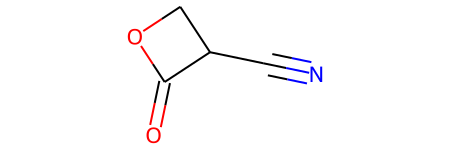

In [22]:
Chem.MolFromSmiles("O=C1OCC1C#N")

From its SMILES representation, O=C1OCC1C#N, it's possible to infer that the atom of oxygen with two bonds (O=) at the bottom of the image was the starting point. The edges of the graph represents an atom of carbon unless it is specified otherwise. The next atom is, therefore, an atom of carbon, forming the sequence O=C. The counting then goes left to the next oxygen atom, followed by the carbon atom at the top and the carbon at the right edge of square graph. Finally, the last carbon is bounded with the nitrogen atom, forming the SMILES representation O=COCCC#N, where the symbol # represents a triple bound between two atoms. The only missing symbol is the number 1. The numbers on a SMILES string represents a ring structure. Thus, the ring structure starts at the first counted carbon atom (O=C1) and finishes in the carbon at the right edge of the square graph, which produces the O=C1OCC1C#N SMILES.<br>
Now, one can set the starting point on each and every atom of this molecule and still get a valid representation. Starting at the nitrogen atom, an analogous SMILES would be N#CC1COC1=O, as can be seem below. The molecule is still the same, just flipped 90 degrees horizontally.

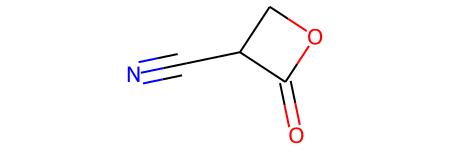

In [23]:
Chem.MolFromSmiles("N#CC1COC1=O")

Now, let's check if there are duplicated canonical SMILES. 

In [24]:
df["canon_smiles"][df["canon_smiles"].duplicated()]

12020      C#Cc1cnc(N)cn1
18812       Nc1nncc(O)c1O
23496      Cc1cnc(C=O)cn1
24273      CC(=O)c1cnccn1
25092        Nc1cnnc(O)c1
               ...       
130048    c1cnc(N2CC2)cn1
131449        O=Cc1cnccn1
131479     C#Cc1cnc(C)cn1
131584       CC#Cc1cnccn1
132608      Nc1nncc(F)c1N
Name: canon_smiles, Length: 87, dtype: object

There are 87 repeated canonical SMILES. This means that there are different SMILES strings representing the same molecule. To ensure it, let's visualize a few of these molecules and its properties.

In [25]:
df[df["canon_smiles"] == "COc1cnccn1"]

,A,B,C,mu,alfa,homo,lumo,gap,R²,zpve,U0,U,H,G,Cv,smiles,mol,num_of_atoms,num_of_heavy_atoms,canon_smiles
97962,5.39096,1.66577,1.28282,1.6581,67.309998,-0.2413,-0.0421,0.1992,902.531799,0.109364,-378.768066,-378.761414,-378.760468,-378.799072,24.305,COC1=NC=CN=C1,<rdkit.Chem.rdchem.Mol object at 0x7fd8c1058a30>,14,8,COc1cnccn1
115511,5.39096,1.66577,1.28282,1.6581,67.309998,-0.2413,-0.0421,0.1992,902.531799,0.109364,-378.768066,-378.761414,-378.760468,-378.799072,24.305,COC1=CN=CC=N1,<rdkit.Chem.rdchem.Mol object at 0x7fd8c0eb79e0>,14,8,COc1cnccn1


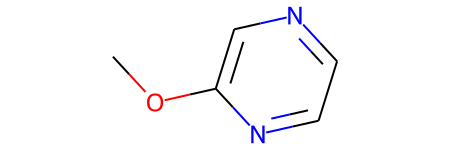

In [26]:
Chem.MolFromSmiles("COC1=CN=CC=N1")

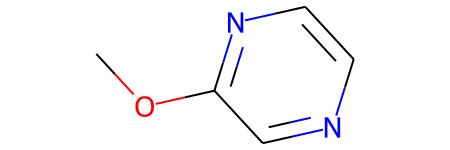

In [27]:
Chem.MolFromSmiles("COC1=NC=CN=C1")

Properties' values are indeed the same and drawing the molecules actually helps to understand the reason. The only difference between the molecules are the placements of the nitrogen atoms. Such difference had no impact on the molecules's properties and, as such, they will be dropped from the dataframe.

In [28]:
# Index of the duplicated rows
ind = df.index[df["canon_smiles"].duplicated()]
df = df.drop(ind)

Now, a new mol object will be created taking into account the canonical SMILES representation, as a way to ensure that subsequent procedures will be performed using a correct and unique representation. 

In [29]:
df["mol"] = df["canon_smiles"].apply(lambda x: Chem.MolFromSmiles(x))

As a final step in the data wrangling process, properties outliers will be evaluated.

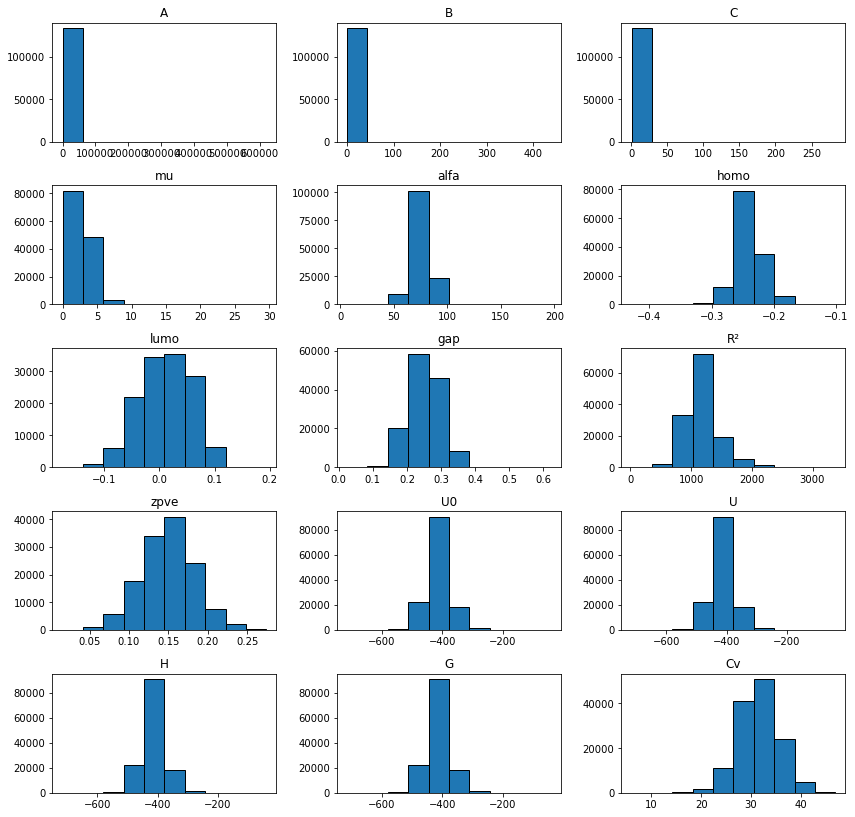

In [30]:
plt.figure(figsize=(12, 18))
plot_counter = 1
for prop in df.iloc[:, :15].columns:
    plt.subplot(int(np.ceil(len(df.iloc[:, :15].columns) / 2)), 3, plot_counter)
    plt.hist(df.iloc[:, :15][prop], edgecolor="k")
    plt.title(prop)
    plot_counter += 1
plt.tight_layout()
plt.show()

In [31]:
df.describe()

,A,B,C,mu,alfa,homo,lumo,gap,R²,zpve,U0,U,H,G,Cv,num_of_atoms,num_of_heavy_atoms
count,133798.000000,133798.000000,133798.000000,133798.000000,133798.000000,133798.000000,133798.000000,133798.000000,133798.000000,133798.000000,133798.000000,133798.000000,133798.000000,133798.000000,133798.000000,133798.000000,133798.000000
mean,9.817743,1.406115,1.124975,2.706025,75.192955,-0.239976,0.011164,0.251139,1189.553833,0.148552,-411.527008,-411.510956,-411.509033,-411.586823,31.603392,17.986069,8.795886
std,1810.042725,1.584237,1.095932,1.530332,8.187132,0.022133,0.046922,0.047506,279.793640,0.033264,40.054455,40.054489,40.054543,40.054745,4.061616,2.953332,0.508952
min,0.000000,0.337120,0.331180,0.000000,6.310000,-0.428600,-0.175000,0.024600,19.000200,0.015951,-714.568054,-714.560181,-714.559204,-714.602112,6.002000,3.000000,1.000000
25%,2.554310,1.091790,0.910563,1.588800,70.379997,-0.252500,-0.023800,0.216300,1018.340546,0.125308,-437.913811,-437.905693,-437.904755,-437.947525,28.945000,16.000000,9.000000
50%,3.089935,1.370030,1.078720,2.500050,75.500000,-0.241000,0.012000,0.249500,1147.573181,0.148341,-417.864075,-417.856445,-417.855499,-417.895630,31.556999,18.000000,9.000000
75%,3.834450,1.653957,1.279640,3.635900,80.519997,-0.228700,0.049200,0.288200,1308.888245,0.171158,-387.049057,-387.039703,-387.038757,-387.083221,34.278000,20.000000,9.000000
max,619867.687500,437.903870,282.945465,29.556400,196.619995,-0.101700,0.193500,0.622100,3374.753174,0.273944,-40.478931,-40.476063,-40.475117,-40.498596,46.969002,29.000000,9.000000


Rotational constant A seems to have some outliers, as the maximum value is much greater than the mean. Although rotational constants B and C also seem to also have outliers, values of these properties can [hugely vary](http://www.colby.edu/chemistry/PChem/scripts/ABC.html), going from 11 GHz (Rotational constant A) for the ozone molecule, to as high as 816.68 GHz (Rotational constant C) for the water molecule.

In [32]:
# Checking for unusual values
df[df["A"] > 100]

,A,B,C,mu,alfa,homo,lumo,gap,R²,zpve,U0,U,H,G,Cv,smiles,mol,num_of_atoms,num_of_heavy_atoms,canon_smiles
6205,160.280411,8.593230,8.593210,0.7156,28.780001,-0.2609,0.0613,0.3222,177.196304,0.055410,-116.609550,-116.605553,-116.604607,-116.633774,12.482000,CC#C,<rdkit.Chem.rdchem.Mol object at 0x7fd8ebfd0cb0>,7,3,C#CC
9492,232663.781250,0.570310,0.570310,0.0096,119.419998,-0.2383,-0.0774,0.1609,1770.345459,0.058203,-305.770203,-305.762421,-305.761475,-305.797943,27.635000,C#CC#CC#CC#C,<rdkit.Chem.rdchem.Mol object at 0x7fd8ebf928a0>,10,8,C#CC#CC#CC#C
21904,157.711807,157.709976,157.706985,0.0000,13.210000,-0.3877,0.1171,0.5048,35.364101,0.044749,-40.478931,-40.476063,-40.475117,-40.498596,6.469000,C,<rdkit.Chem.rdchem.Mol object at 0x7fd8c0cc7bc0>,5,1,C
27387,159.655106,0.377100,0.377100,7.3662,130.860001,-0.2540,-0.0911,0.1628,2674.166504,0.076809,-361.170929,-361.161896,-361.160950,-361.205109,29.965000,CC#CC#CC#CC#N,<rdkit.Chem.rdchem.Mol object at 0x7fd8c0c35580>,12,9,CC#CC#CC#CC#N
31832,619867.687500,1.334550,1.334540,0.0151,72.389999,-0.2465,-0.0565,0.1900,802.148499,0.046718,-229.615448,-229.609222,-229.608276,-229.639954,21.875000,C#CC#CC#C,<rdkit.Chem.rdchem.Mol object at 0x7fd8c0c0e3f0>,8,6,C#CC#CC#C
35430,159.871170,0.379330,0.379330,1.9087,143.529999,-0.2266,-0.0676,0.1589,2708.153809,0.085798,-345.074463,-345.064758,-345.063812,-345.108856,33.347000,CC#CC#CC#CC#C,<rdkit.Chem.rdchem.Mol object at 0x7fd8c0bd6300>,13,9,C#CC#CC#CC#CC
53871,159.619873,0.782570,0.782570,6.3203,82.739998,-0.2665,-0.0718,0.1947,1344.432739,0.065892,-285.016357,-285.009094,-285.008148,-285.047272,23.785999,CC#CC#CC#N,<rdkit.Chem.rdchem.Mol object at 0x7fd8c0a46df0>,10,7,CC#CC#CC#N
71740,159.934586,0.783440,0.783440,1.5732,92.339996,-0.2323,-0.0452,0.1871,1373.624756,0.075867,-268.917908,-268.910156,-268.909241,-268.949005,26.267000,CC#CC#CC#C,<rdkit.Chem.rdchem.Mol object at 0x7fd8c08abdf0>,11,7,C#CC#CC#CC
76743,127.834969,24.858721,23.978720,1.5258,16.969999,-0.2653,0.0784,0.3437,83.793999,0.051208,-115.679138,-115.675819,-115.674873,-115.701874,8.751000,CO,<rdkit.Chem.rdchem.Mol object at 0x7fd8c088fdf0>,6,2,CO
81328,159.035675,9.223270,9.223240,3.8266,24.450001,-0.3264,0.0376,0.3640,160.722305,0.045286,-132.718155,-132.714569,-132.713623,-132.742142,10.287000,CC#N,<rdkit.Chem.rdchem.Mol object at 0x7fd8c07eb850>,6,3,CC#N


Indeed, the molecules with ID 9492 and 31832 have values for the rotational constant A that are far above the mean value for such property. They will be dropped. As explained above, even though some values of the rotational constants seem to be outliers, they are within a reasonable range of values and, therefore, will be left untoched. 

In [33]:
df = df.drop([9492, 31832])

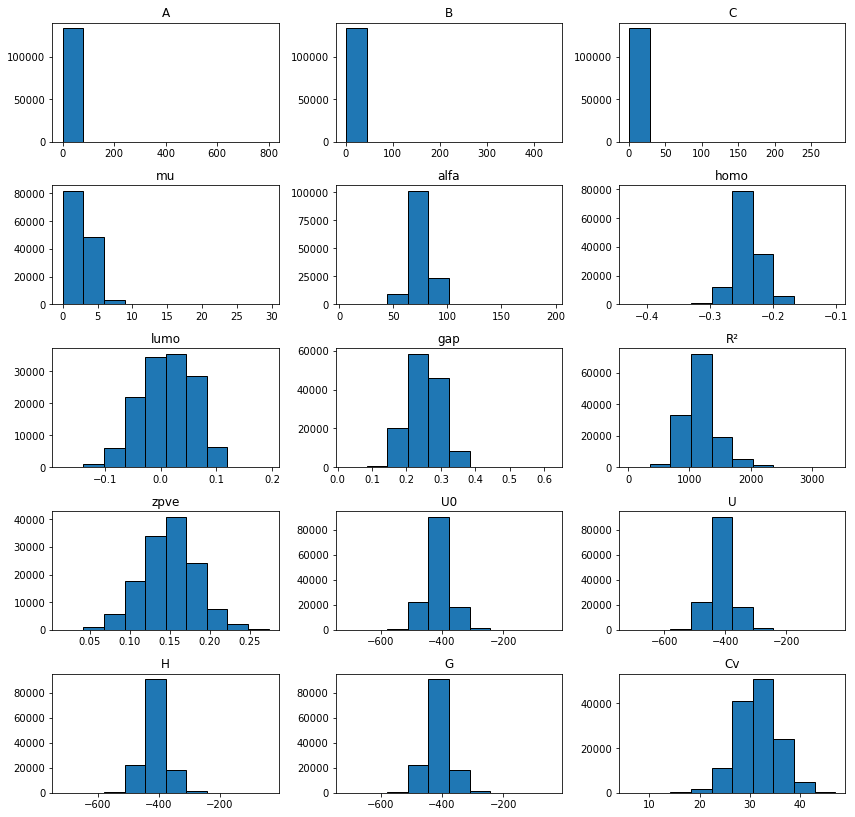

In [34]:
plt.figure(figsize=(12, 18))
plot_counter = 1
for prop in df.iloc[:, :15].columns:
    plt.subplot(int(np.ceil(len(df.iloc[:, :15].columns) / 2)), 3, plot_counter)
    plt.hist(df.iloc[:, :15][prop], edgecolor="k")
    plt.title(prop)
    plot_counter += 1
plt.tight_layout()
plt.show()

In [35]:
# Saving the final dataframe
df.to_csv("qm9.csv")

The data wrangling process ends here. It was somehow easier than first expected as the dataset was well structured from the beginning. Further analysis are welcomed to ensure that the python packages employed to read, extract and manipulate the data did in fact work as planned and all the information up until this point is valid and can be used to make properties prediction.

**3.2 Exploratory data analysis**

The following question will allow a better understanding of the qm9 dataset properties as a whole.
1. What are the main clusters according to the atomic number?
2. How are the properties distributed in these clusters?
3. What is the distribution of heavy atoms in each molecule?
4. How are the properties distributed according to the number of heavy atoms?
5. What molecular descriptors can be used to represent the molecules?
6. What type of molecular descriptors yelds the best property prediction?

**3.2.1 What is the frequency of molecules according to their atomic number?**

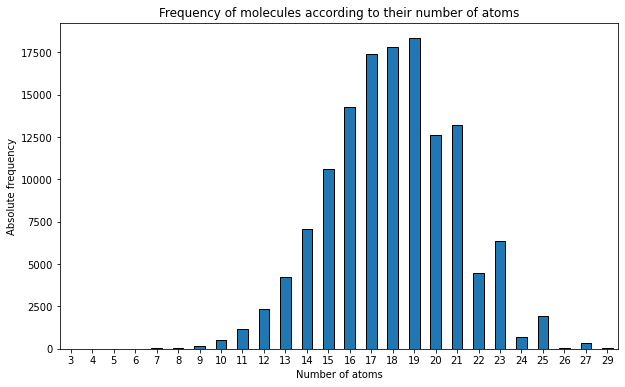

In [35]:
df["num_of_atoms"].value_counts(sort=False).plot.bar(
    figsize=(10, 6),
    title="Frequency of molecules according to their number of atoms",
    xlabel="Number of atoms",
    ylabel="Absolute frequency",
    rot=0,
    edgecolor="k",
)
plt.show()

The frequency of the molecules according to the number of atoms loosely follows a normal distribution, with molecules containing 17, 18 and 19 atoms being predominant. Each of these cluster could probably be used for further machine learning model benchmark, as an alternative for using the whole dataset. 

**3.2.2 How are the properties distributed in these clusters?**

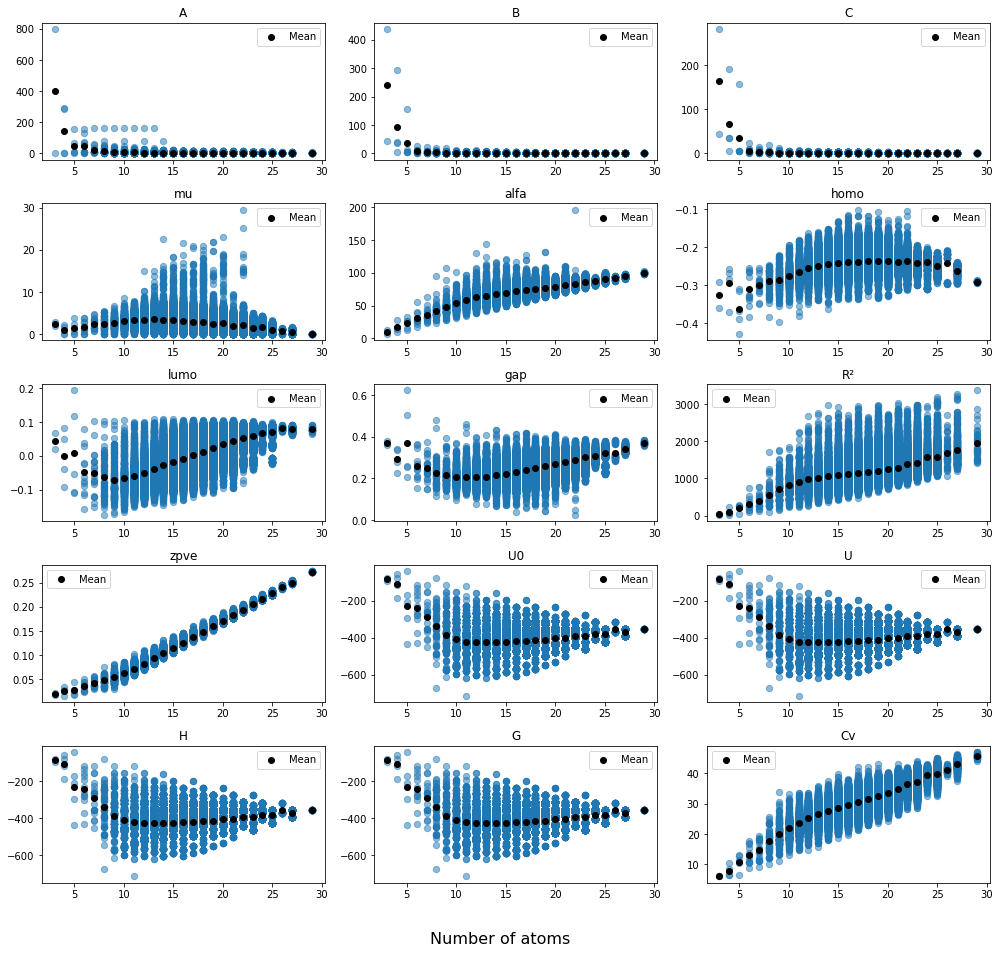

In [36]:
plt.figure(figsize=(14, 20))
plot_counter = 1
for prop in df.iloc[:, :15].columns:
    plt.subplot(int(np.ceil(len(df.iloc[:, :15].columns) / 2)), 3, plot_counter)
    plt.scatter(df["num_of_atoms"], df[prop], s=40, alpha=0.5)

    for atom in np.unique(df["num_of_atoms"]):
        plt.scatter(
            atom, df[prop][df["num_of_atoms"] == atom].mean(), c="k", label="Mean"
        )

    # Dictionaries can't have duplicated keys
    # This prevents repeated legend entries
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())

    plt.title(prop)
    plot_counter = plot_counter + 1

plt.suptitle("Number of atoms", x=0.5, y=0.35, ha="center", size=16)
plt.tight_layout()
plt.show()

There are some very interesting results:
* zpve ([zero-point vibrational energy](https://www.britannica.com/science/zero-point-energy)): It represents the lowest possible energy a quantum system may have. Thus, it makes sense that the more atoms a molecule has, the more its vibrational energy would be. However, it's interesting to note that the relationship between this property and the number of atoms is almost linear.
* Cv ([heat capacity](https://www.britannica.com/science/heat-capacity) at 298.15 K): It's the amount of heat per unit mass that is required to raise the temperature by 1°C. Its value also grows with the number of atoms in a molecule in almost a linear fashion.
* Uo, U, H and G (internal energy at 0 K, internal energy at 298.15 K, enthalpy at 298.15 K, free energy at 298.15 K): They all follow the same behavior and visually, it could be argue that their values are virtually the same, as can also be seen on the histogram presented earlier.

It's also important to note two things. First, the variance of the properties seems to decrease the more atoms a molecule has. This could result in better properties predictions. However, this can be a simple consequence of the fact that molecules with 20 atoms or more are far more rare in the dataset. Second, using molecules with only a specific number of atoms might not be representative when using machine learning algorithms for property predictions, as the values of some properties can greatly vary with the total number of atoms. 

**3.2.3 What is the distribution of heavy atoms in each molecule?**

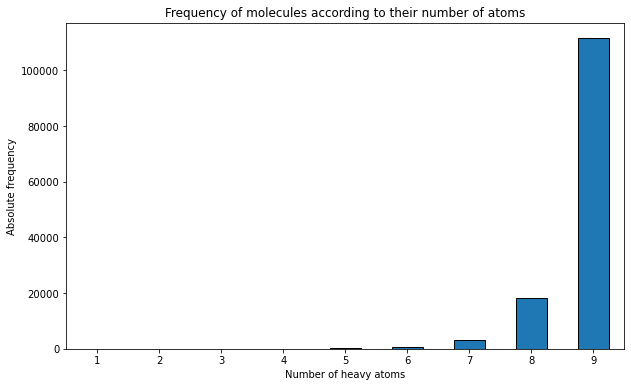

In [37]:
df["num_of_heavy_atoms"].value_counts(sort=False).plot.bar(
    figsize=(10, 6),
    title="Frequency of molecules according to their number of atoms",
    xlabel="Number of heavy atoms",
    ylabel="Absolute frequency",
    rot=0,
    edgecolor="k",
)
plt.show()

The majority of molecules have 9 heavy atoms in its composition. If later analysis prove to be problematic due to atoms with lower number of heavy atoms, it might be safe to just exclude such molecules.

**3.2.4 How are the properties distributed according to the number of heavy atoms?**

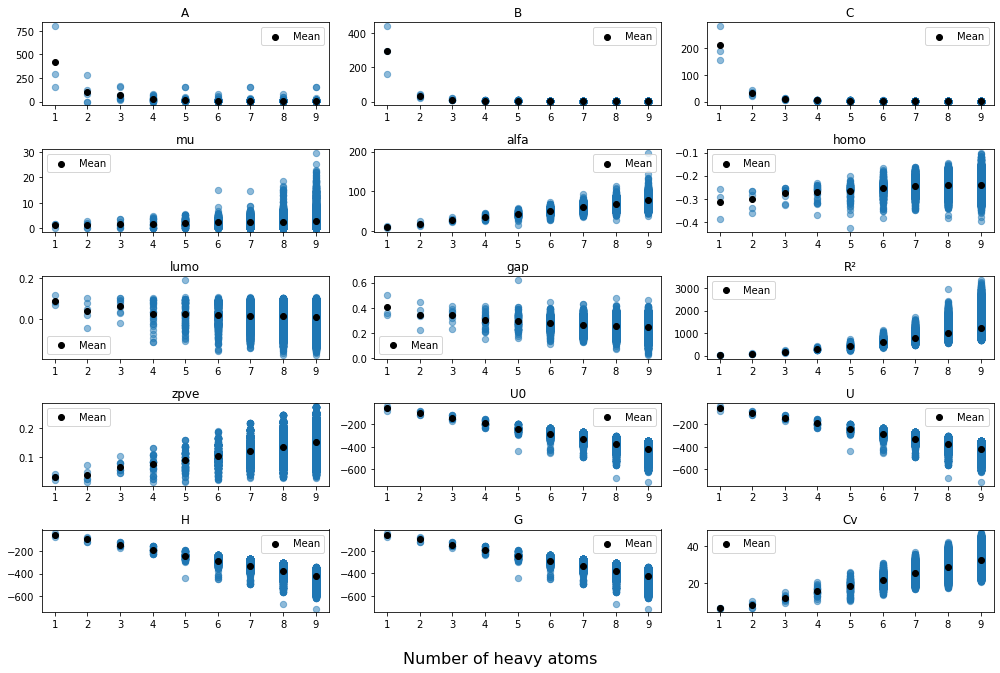

In [38]:
plt.figure(figsize=(14, 14))
plot_counter = 1
for prop in df.iloc[:, :15].columns:
    plt.subplot(int(np.ceil(len(df.iloc[:, :15].columns) / 2)), 3, plot_counter)
    plt.scatter(df["num_of_heavy_atoms"], df[prop], s=40, alpha=0.5)

    for atom in np.unique(df["num_of_heavy_atoms"]):
        plt.scatter(
            atom, df[prop][df["num_of_heavy_atoms"] == atom].mean(), c="k", label="Mean"
        )

    # Dictionaries can't have duplicated keys
    # This prevents repeated legend entries
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())

    plt.title(prop)
    plot_counter = plot_counter + 1

plt.suptitle("Number of heavy atoms", x=0.5, y=0.35, ha="center", size=16)
plt.tight_layout()
plt.show()

The overall behavior of the properties when considering only the heavy atoms of a molecule follows, to some extent, the same behavior as seen before. Some properties' values grows with the number of heavy atoms, while some decrease and some appears to remain somewhat constant.

**3.2.5 What molecular descriptors can be used to represent the molecules?**

Molecule descriptors can be thought of as a mathematical representations of molecules' properties that are generated by algorithms. The numerical values of such descriptors are used to quantitatively describe the physical and chemical information of the molecules [7]. They can be divided as experimental measurements and theoretical molecular descriptors, which are derived from a symbolic representation of the molecule. Hence the importance to ensure SMILES valid and uniqueness. In this sense, the properties of the molecules from the qm9 dataset can be seen as descriptors. Thus, we will be using properties calculated from the SMILES strings to predict known properties of the qm9 molecules. However, due to memory issues, only the molecules with 19 atoms will be considered at first for the descriptors calculation.

In [39]:
# Using only the molecules with 19 atoms
calc = Calculator(descriptors, ignore_3D=True)
df_desc = calc.pandas(df["mol"][df["num_of_atoms"] == 19])

# Saving the resulting file
df_desc.to_csv("descriptors.csv")

100%|██████████| 18333/18333 [15:32<00:00, 19.65it/s]


In [41]:
df_desc.info()

<class 'mordred._base.pandas_module.MordredDataFrame'>
Int64Index: 18333 entries, 5 to 133882
Columns: 1613 entries, ABC to mZagreb2
dtypes: bool(2), float64(945), int64(326), object(340)
memory usage: 225.5+ MB


In [42]:
df_desc.loc[:, df_desc.dtypes == np.object]

,AATS6dv,AATS7dv,AATS8dv,AATS6d,AATS7d,AATS8d,AATS6s,AATS7s,AATS8s,AATS6Z,...,MDEC-44,MDEO-11,MDEO-12,MDEO-22,MDEN-11,MDEN-12,MDEN-13,MDEN-22,MDEN-23,MDEN-33
5,invalid value encountered in double_scalars (A...,invalid value encountered in double_scalars (A...,invalid value encountered in double_scalars (A...,invalid value encountered in double_scalars (A...,invalid value encountered in double_scalars (A...,invalid value encountered in double_scalars (A...,invalid value encountered in double_scalars (A...,invalid value encountered in double_scalars (A...,invalid value encountered in double_scalars (A...,invalid value encountered in double_scalars (A...,...,float division by zero (MDEC-44),float division by zero (MDEO-11),float division by zero (MDEO-12),float division by zero (MDEO-22),float division by zero (MDEN-11),float division by zero (MDEN-12),float division by zero (MDEN-13),float division by zero (MDEN-22),float division by zero (MDEN-23),float division by zero (MDEN-33)
7,0,0,invalid value encountered in double_scalars (A...,1,1,invalid value encountered in double_scalars (A...,2.44444,1,invalid value encountered in double_scalars (A...,3.55556,...,float division by zero (MDEC-44),float division by zero (MDEO-11),0.25,float division by zero (MDEO-22),float division by zero (MDEN-11),float division by zero (MDEN-12),float division by zero (MDEN-13),float division by zero (MDEN-22),float division by zero (MDEN-23),float division by zero (MDEN-33)
8,0,invalid value encountered in double_scalars (A...,invalid value encountered in double_scalars (A...,1,invalid value encountered in double_scalars (A...,invalid value encountered in double_scalars (A...,1,invalid value encountered in double_scalars (A...,invalid value encountered in double_scalars (A...,1,...,float division by zero (MDEC-44),0.333333,float division by zero (MDEO-12),float division by zero (MDEO-22),float division by zero (MDEN-11),float division by zero (MDEN-12),float division by zero (MDEN-13),float division by zero (MDEN-22),float division by zero (MDEN-23),float division by zero (MDEN-33)
10,0,invalid value encountered in double_scalars (A...,invalid value encountered in double_scalars (A...,1,invalid value encountered in double_scalars (A...,invalid value encountered in double_scalars (A...,1,invalid value encountered in double_scalars (A...,invalid value encountered in double_scalars (A...,1,...,float division by zero (MDEC-44),float division by zero (MDEO-11),float division by zero (MDEO-12),float division by zero (MDEO-22),float division by zero (MDEN-11),float division by zero (MDEN-12),float division by zero (MDEN-13),float division by zero (MDEN-22),0.5,float division by zero (MDEN-33)
19,0,invalid value encountered in double_scalars (A...,invalid value encountered in double_scalars (A...,1,invalid value encountered in double_scalars (A...,invalid value encountered in double_scalars (A...,4,invalid value encountered in double_scalars (A...,invalid value encountered in double_scalars (A...,4.5,...,float division by zero (MDEC-44),float division by zero (MDEO-11),0.25,float division by zero (MDEO-22),float division by zero (MDEN-11),float division by zero (MDEN-12),float division by zero (MDEN-13),float division by zero (MDEN-22),float division by zero (MDEN-23),float division by zero (MDEN-33)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133848,0,invalid value encountered in double_scalars (A...,invalid value encountered in double_scalars (A...,1,invalid value encountered in double_scalars (A...,invalid value encountered in double_scalars (A...,1,invalid value encountered in double_scalars (A...,invalid value encountered in double_scalars (A...,1,...,1,float division by zero (MDEO-11),0.5,float division by zero (MDEO-22),float division by zero (MDEN-11),float division by zero (MDEN-12),float division by zero (MDEN-13),float division by zero (MDEN-22),float division by zero (MDEN-23),float division by zero 

There are a huge number of columns which are failed attempts to generate a descriptor. They will be deleted and there rest will be set as float32.

In [43]:
df_desc = df_desc.select_dtypes(include=np.number).astype("float32")

In [44]:
# Removing columns with variance = 0
df_desc = df_desc.loc[:, df_desc.var() > 0.0]

In [45]:
# Normalizing the descriptors
df_descN = pd.DataFrame(MinMaxScaler().fit_transform(df_desc), columns=df_desc.columns)

In [46]:
# Selecting the initial properties for molecules with only 19 atoms
df_19 = df[df["num_of_atoms"] == 19]

In [47]:
df_19.head()

,A,B,C,mu,alfa,homo,lumo,gap,R²,zpve,U0,U,H,G,Cv,smiles,mol,num_of_atoms,num_of_heavy_atoms,canon_smiles
5,3.59316,1.69711,1.59696,1.6895,78.010002,-0.2341,0.0823,0.3164,912.771912,0.162283,-385.809967,-385.803833,-385.802887,-385.840027,27.101999,C1CC23CC4OC2C4C13,<rdkit.Chem.rdchem.Mol object at 0x7fd8ec052990>,19,9,C1CC23CC4OC2C4C13
7,2.33115,1.21699,0.92295,2.5427,79.930000,-0.2247,0.0457,0.2703,1320.507446,0.156343,-422.960236,-422.950348,-422.949402,-422.994904,36.480999,COCC1(CC1O)C#C,<rdkit.Chem.rdchem.Mol object at 0x7fd8ec052d50>,19,9,C#CC1(COC)CC1O
8,2.71291,1.30858,1.18434,1.9880,76.040001,-0.2417,-0.0284,0.2134,1144.154907,0.157648,-423.017029,-423.008057,-423.007111,-423.050934,33.743999,OC1(CCC1=O)C1CC1,<rdkit.Chem.rdchem.Mol object at 0x7fd8ec052cb0>,19,9,O=C1CCC1(O)C1CC1
10,2.61890,1.51982,1.22413,2.3586,77.519997,-0.2427,-0.0118,0.2309,1107.649902,0.158601,-419.270111,-419.260681,-419.259735,-419.304138,34.222000,CN1C=NC(C)(C)C1=O,<rdkit.Chem.rdchem.Mol object at 0x7fd8ec052b70>,19,9,CN1C=NC(C)(C)C1=O
19,3.06195,1.19022,0.90164,2.8112,78.019997,-0.2440,-0.0258,0.2182,1272.939697,0.159310,-423.030792,-423.022217,-423.021271,-423.064758,31.527000,O=CC1COCC=CC1,<rdkit.Chem.rdchem.Mol object at 0x7fd8ec0503f0>,19,9,O=CC1CC=CCOC1


In [48]:
np.shape(df_descN)

(18333, 1069)

Now, the property predictions can be done in a very straightforward way. Such task will be performed by a simple mlp network with two hidden layers and the same number of neurons on each layer. The number of neurons can be set when calling the ```neural_model``` function. The k-fold cross validation method, with k=5, will also be used to reduce the chances of overfitting. Lastly, the mean squared error will be evaluated for each fold and its mean will represent the accuracy of the model.

**3.2.6 What type of molecular descriptors yelds the best property prediction?**

In [49]:
# Testing with the "mu" (dipole moment) property
x_train, x_test, y_train, y_test = train_test_split(
    df_descN, df_19["mu"], test_size=0.2, random_state=42
)

In [61]:
def neural_model(x, y, x_test, y_test, neurons):
    """
    Neural network model

    Inputs
    x: descriptors values for training and validation
    y: properties values for training and validation
    x_test: descriptors values for test
    y_test: properties values for test


    Outputs
    model: trained neural network model
    score: a list with the score values for each fold
    """
    np.random.seed(1)
    score = []
    kfold = KFold(n_splits=5, shuffle=True)

    model = Sequential()
    model.add(Dense(neurons, input_dim=x.shape[1], activation="relu"))
    model.add(Dense(neurons, activation="relu"))
    model.add(Dense(1, activation="linear"))

    opt = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(
        loss="mean_squared_error", optimizer=opt, metrics=["mean_absolute_error"]
    )

    rlrop = ReduceLROnPlateau(monitor="val_loss", factor=0.01, patience=10)

    for train, validation in kfold.split(x, y):
        model.fit(
            x.iloc[train],
            y.iloc[train],
            epochs=100,
            batch_size=128,
            callbacks=[rlrop],
            verbose=0,
            validation_data=(x.iloc[validation], y.iloc[validation]),
        )

        score.append(model.evaluate(x_test, y_test))

    return model, score

In [62]:
model, score = neural_model(x_train, y_train, x_test, y_test, neurons=64)

115/115 [==============================] - 0s 779us/step - loss: 0.5438 - mean_absolute_error: 0.5408


In [64]:
print(f"mse: {np.mean(score):.3f} \u00B1 {np.std(score):.3f} ")

mse: 0.542 ± 0.002 


As a first approach, this result is reasonable and can be comparable with values achieved in other works [8]. To evaluate the property predictions using other approach, the Coloumb Matrix will be calculated next. The Coulomb Matrix is a simple global descriptor which mimics the electrostatic interaction between nuclei [9]. It is calculated with the equation below.

\begin{equation}
  M_{ij} =
    \begin{cases}
      0.5Z_{i}^{2.4} ~ ~ ~\text{for i=j}\\
      \frac{Z_{i}Z_{j}}{R_{ij}} ~ ~ ~\text{for i} \neq \text{j}\\
    \end{cases}       
\end{equation}

The diagonal elements can be seen as the interaction of an atom with itself and are essentially a polynomial fit of the atomic energies to the nuclear charge $Z_{i}$. The off-diagonal elements represent the Coulomb repulsion between nuclei $i$ and $j$. Using the package ```molml```, it's quite straightforward to retrieve such descriptor. However, instead of using the whole Coloumb Matrix, only the eigenvalues will be retrieved.

In [65]:
# Selecting the molecules with 19 atoms in the "data" object
data19 = []
for i in range(len(data)):
    if len(data[i][0]) == 19:
        data19.append(data[i])

In [66]:
# Eigenvalues of the coloumb matrix
feat = CoulombMatrix(eigen=True, sort=True)
feat.fit(data19)

cm = feat.transform(data19)
df_cm = pd.DataFrame(cm)
df_cm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,192.733044,61.257052,31.975498,30.053108,20.586618,15.522301,12.296762,7.743863,5.078063,0.008919,-0.071265,-0.131334,-0.161878,-0.342503,-0.400499,-0.489444,-0.610829,-0.758582,-0.907358
1,190.576732,68.540661,58.727044,34.142501,22.605777,16.238710,10.919513,9.277910,3.235070,0.016047,-0.055734,-0.071778,-0.141601,-0.348920,-0.511476,-0.624751,-0.762120,-0.838682,-0.884777
2,194.436947,68.103200,49.963954,41.488859,18.562727,15.043538,13.813247,9.060937,3.482464,0.037074,-0.009688,-0.120480,-0.132635,-0.292088,-0.472387,-0.497168,-0.681197,-0.842153,-0.905026
3,199.792377,61.703142,51.984325,32.150983,24.211516,18.526734,13.223556,5.391106,3.045849,-0.009754,-0.042728,-0.057315,-0.078124,-0.111553,-0.130163,-0.535242,-0.819074,-0.929495,-0.933399
4,188.165036,79.661248,52.769409,36.689208,18.034308,16.565057,10.911002,6.049545,5.105052,0.015382,-0.076628,-0.114530,-0.151552,-0.252702,-0.442816,-0.500593,-0.631019,-0.808466,-0.946814


In [79]:
np.shape(df_cm)

(18336, 19)

In [69]:
df_cm = pd.DataFrame(MinMaxScaler().fit_transform(df_cm))
df_cm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.526111,0.383903,0.202742,0.340103,0.288634,0.429156,0.595325,0.583224,0.594932,0.482342,0.481533,0.660573,0.708187,0.383754,0.451444,0.662222,0.718226,0.631152,0.668130
1,0.509093,0.488775,0.706359,0.428424,0.350527,0.465314,0.514037,0.698592,0.382010,0.508566,0.563953,0.859510,0.766251,0.369321,0.260806,0.391377,0.344848,0.425282,0.722603
2,0.539559,0.482476,0.541387,0.587088,0.226596,0.404992,0.684830,0.682275,0.410592,0.585923,0.808315,0.696829,0.791925,0.497148,0.327954,0.646761,0.544562,0.416361,0.673755
3,0.581827,0.390326,0.579422,0.385412,0.399747,0.580795,0.650025,0.406285,0.360149,0.413645,0.632979,0.907821,0.948018,0.903210,0.915829,0.570547,0.204289,0.191878,0.605312
4,0.490058,0.648893,0.594202,0.483427,0.210399,0.481786,0.513535,0.455803,0.598050,0.506119,0.453072,0.716705,0.737756,0.585735,0.378752,0.639905,0.668398,0.502941,0.572951


In [70]:
x_train, x_test, y_train, y_test = train_test_split(
    df_cm, df_19["mu"], test_size=0.2, random_state=42
)

In [77]:
model2, score2 = neural_model(x_train, y_train, x_test, y_test, neurons=64)

115/115 [==============================] - 0s 639us/step - loss: 1.1502 - mean_absolute_error: 0.8229


In [78]:
print(f"mse: {np.mean(score2):.3f} \u00B1 {np.std(score2):.3f} ")

mse: 0.987 ± 0.164 


Using the same parameters set for the previous calculations, it's evident that using the molecules descriptors, other than the Coloumb Matrix, the results are considerably better. Perhaps it's just a matter of the sheer number of descriptors, 1069, in comparison with the 19 eigenvalues extracted from the Coloumb Matrix. This greater dimensionality may allow the neural network to learn better relationship between the descriptors and the desired properties, thus yeilding better predictions.

# Referências

[1] R. Ramakrishnan, P. O. Dral, M. Rupp, O. A. von Lilienfeld, Quantum chemistry structures and properties of 134 kilo molecules, *Scientific Data 1*, 140022, 2014.<br>
[2] Gilmer, J., et al. Neural message passing for quantum chemistry. *ICML17: Proceedings of the 34th International Conference on Machine Learning*, 70, 1263–1272, 2017.<br>
[3] Chen, C., et al. Graph Networks as a Universal Machine Learning Framework for Molecules and Crystals. *Chemistry of Materials*, 31, 3564-3572, 2019.<br>
[4] https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system<br>
[5] Lengeling, B. S.; Guzik, A. A. Inverse molecular design using machine learning: Generative models for matter engineering. *Science*, 361, 360 - 365, 2018.<br>
[6] Schneider, N.; Sayle, R. A.; Landrum, A. Get Your Atoms in Order—An Open-Source Implementation of a Novel and Robust Molecular Canonicalization Algorithm. *Journal of Chemical Information and Modeling*, 55, 2111-2120, 2015.<br>
[7] Chandrasekaran, B., et al. Computer-Aided Prediction of Pharmacokinetic (ADMET) Properties. *Dosage From Design Parameters - Volume II*. Advances in Pharmaceutical Product Development and Research, 731-755, 2018. <br>
[8] Pinheiro, G. A. Machine Learning Prediction of Nine Molecular Properties Based on
the SMILES Representation of the QM9 Quantum-Chemistry Dataset. *The Journal of Physical Chemistry A*, 124 (47), 9854-9866, 2020. <br>
[9] Rupp, M., et al. Fast and Accurate Modeling of Molecular Atomization Energies with Machine Learning. *PHYSICAL REVIEW LETTERS*, 108, 2012.